In [1]:
import pandas as pd
df = pd.read_excel('Cr-poisoning.xlsx')

In [2]:
import numpy as np

In [3]:
X1 = df['log pO2 /bar'].tolist()
X2 = df['log CrO3 /bar'].tolist()
X = np.c_[X1,X2]
y = df['reaction product']

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf = SVC(gamma=0.5, kernel='linear',C = 20)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1, 0, 0, 0, 0],
       [0, 6, 0, 0, 0],
       [0, 0, 4, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

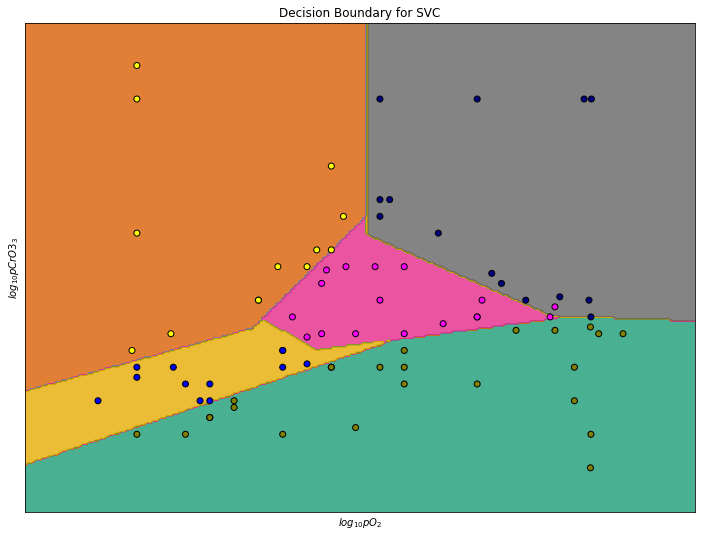

In [43]:
import matplotlib.pyplot as plt
from random import sample
idx = sample(list(df.index), int(df.shape[0]))
h = .02
x_min, x_max  = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
encoder = {'SrO': 1, 'SrCrO3': 2, 'Sr3Cr2O8': 3,'Sr2CrO4':4,'SrCrO4':5}
Z = np.array([encoder[z] for z in Z]).reshape(xx.shape)
plt.figure(figsize=(12, 9))
#plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.contourf(xx, yy, Z, cmap=plt.cm.get_cmap('Dark2'), alpha=0.8)
#plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
# Plot also the training points
col_map = {'SrO': 'olive', 'SrCrO3': 'yellow', 'Sr3Cr2O8': 'magenta','Sr2CrO4':"blue",'SrCrO4':"navy"}
plt.scatter(X_0, X_1, c= [col_map[lb] for lb in df['reaction product']], edgecolors='k', cmap=plt.cm.Paired)
#plt.scatter(X_0, X_1, c=y_letransf, s=20, cmap=plt.cm.get_cmap('Dark2'), edgecolors='k')
plt.ylabel('$log_{10}pCrO3_3$')
plt.xlabel('$log_{10}pO_2$')
plt.title("Decision Boundary for SVC")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.savefig('classification_SVC.png')
plt.show()


In [45]:
y_hat = clf.predict(X_test)

#y_hat = np.array([item.argmax() for item in y_hat]).reshape(y_test.shape)
print(y_test)
print(y_hat)

confusion_mat = confusion_matrix(y_test, y_hat)

30      SrCrO4
0          SrO
22      SrCrO4
31    Sr3Cr2O8
18    Sr3Cr2O8
28         SrO
10     Sr2CrO4
70      SrCrO3
4     Sr3Cr2O8
12      SrCrO3
49      SrCrO3
33      SrCrO3
67    Sr3Cr2O8
35      SrCrO4
68    Sr3Cr2O8
45      SrCrO4
73         SrO
61         SrO
55         SrO
40    Sr3Cr2O8
Name: reaction product, dtype: object
['SrCrO4' 'SrO' 'SrCrO4' 'Sr3Cr2O8' 'Sr3Cr2O8' 'SrO' 'Sr2CrO4' 'SrCrO3'
 'Sr3Cr2O8' 'SrCrO3' 'SrCrO3' 'SrCrO3' 'Sr3Cr2O8' 'SrCrO4' 'Sr3Cr2O8'
 'SrCrO4' 'SrO' 'SrO' 'SrO' 'Sr3Cr2O8']


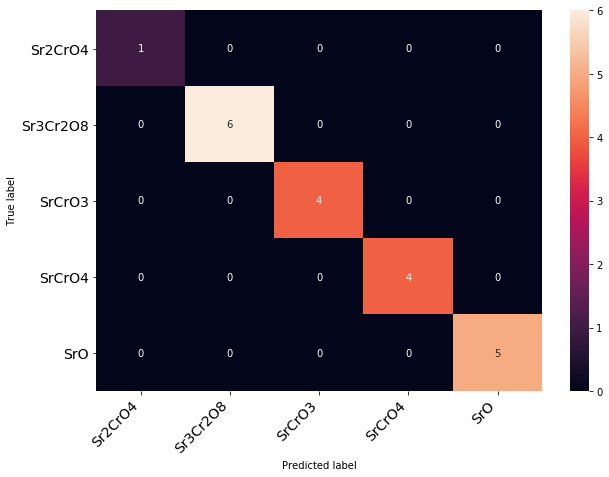

In [46]:
print_confusion_matrix(confusion_mat, ['Sr2CrO4','Sr3Cr2O8', 'SrCrO3', 'SrCrO4', 'SrO'])
plt.savefig("confusion_matrix_SVC.png")

In [8]:
len(X_train[:, 0])

60

In [9]:
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras import optimizers
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

Using TensorFlow backend.


In [10]:
le = LabelEncoder()
le.fit(y_train)
y_tarin = le.transform(y_train)

In [11]:
y_test = le.transform(y_test)

In [12]:
y_tarin = np_utils.to_categorical(y_tarin)

In [13]:
model = Sequential()
model.add(Dense(5, input_shape = [2,], activation = 'tanh'))
model.add(Dense(5, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics = ['accuracy'])

In [15]:
history = model.fit(X_train,y_tarin,epochs=150,batch_size = 4)

Instructions for updating:
Use tf.cast instead.
Epoch 1/150
60/60 [==============================] - 0s 3ms/step - loss: 1.4603 - acc: 0.3500
Epoch 2/150
60/60 [==============================] - 0s 303us/step - loss: 0.9111 - acc: 0.5667
Epoch 3/150
60/60 [==============================] - 0s 291us/step - loss: 0.6936 - acc: 0.6833
Epoch 4/150
60/60 [==============================] - 0s 479us/step - loss: 0.5613 - acc: 0.7833
Epoch 5/150
60/60 [==============================] - 0s 400us/step - loss: 0.5899 - acc: 0.7500
Epoch 6/150
60/60 [==============================] - 0s 285us/step - loss: 0.5056 - acc: 0.7667
Epoch 7/150
60/60 [==============================] - 0s 525us/step - loss: 0.5494 - acc: 0.7667
Epoch 8/150
60/60 [==============================] - 0s 380us/step - loss: 0.5227 - acc: 0.7833
Epoch 9/150
60/60 [==============================] - 0s 394us/step - loss: 0.8550 - acc: 0.6667
Epoch 10/150
60/60 [==============================] - 0s 346us/step - loss: 0.5555 - acc: 

60/60 [==============================] - 0s 543us/step - loss: 0.1386 - acc: 0.9500
Epoch 83/150
60/60 [==============================] - 0s 413us/step - loss: 0.0612 - acc: 0.9833
Epoch 84/150
60/60 [==============================] - 0s 569us/step - loss: 0.0404 - acc: 0.9833
Epoch 85/150
60/60 [==============================] - 0s 450us/step - loss: 0.0538 - acc: 0.9833
Epoch 86/150
60/60 [==============================] - 0s 515us/step - loss: 0.0492 - acc: 0.9833
Epoch 87/150
60/60 [==============================] - 0s 300us/step - loss: 0.0514 - acc: 0.9833
Epoch 88/150
60/60 [==============================] - 0s 544us/step - loss: 0.1095 - acc: 0.9667
Epoch 89/150
60/60 [==============================] - 0s 533us/step - loss: 0.1355 - acc: 0.9667
Epoch 90/150
60/60 [==============================] - 0s 462us/step - loss: 0.0863 - acc: 0.9667
Epoch 91/150
60/60 [==============================] - 0s 579us/step - loss: 0.1471 - acc: 0.9333
Epoch 92/150
60/60 [=======================

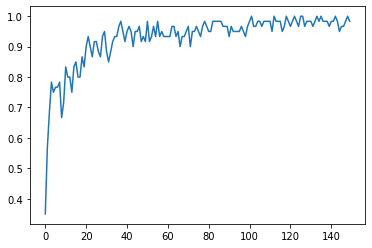

In [16]:
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
plt.plot(history.history['acc'])

In [17]:
y_pred

array([[8.9187252e-10, 2.6930113e-07, 1.1014267e-03, 9.9889827e-01,
        3.1942407e-13],
       [7.2843534e-07, 1.4372731e-05, 1.3671419e-13, 9.7690145e-10,
        9.9998486e-01],
       [2.9656172e-10, 1.8425382e-07, 2.2220793e-04, 9.9977762e-01,
        1.8527878e-13],
       [1.0601488e-05, 9.9577671e-01, 1.8465348e-06, 4.2106211e-03,
        2.2208079e-07],
       [1.8727352e-04, 9.9915326e-01, 1.3017551e-04, 5.2896678e-04,
        3.4910755e-07],
       [7.3160089e-07, 1.4443316e-05, 1.3878399e-13, 1.0152009e-09,
        9.9998486e-01],
       [9.4459820e-01, 9.8866974e-07, 5.5345152e-02, 1.3973279e-08,
        5.5678749e-05],
       [4.7343568e-07, 2.5357744e-07, 9.9953735e-01, 4.6197334e-04,
        4.1381221e-13],
       [5.7419604e-03, 9.9289048e-01, 1.3641793e-03, 3.0355043e-06,
        2.6441177e-07],
       [1.0379858e-03, 4.7808648e-03, 9.9418020e-01, 9.0114486e-07,
        1.6301339e-08],
       [4.1284049e-05, 2.5213050e-05, 9.9993348e-01, 1.1801480e-08,
        2.37

In [18]:
y_pred = [item.argmax() for item in y_pred]

In [19]:
accuracy_score(y_test, y_pred)

1.0

In [20]:
#X = df.iloc[:, 0:2]
X_0=X[ :, 0]
X_1=X[:,1]
y_letransf = le.fit_transform(y.values)

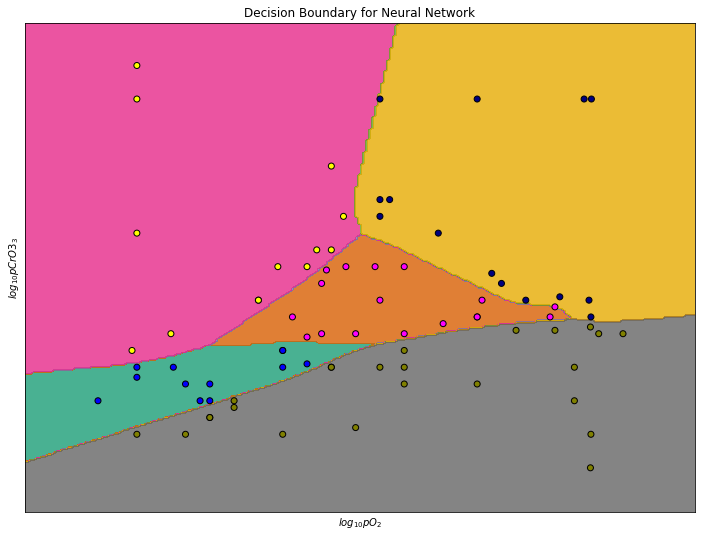

In [42]:
import matplotlib.pyplot as plt
from random import sample
idx = sample(list(df.index), int(df.shape[0]))
h = .02
x_min, x_max  = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array([item.argmax() for item in Z]).reshape(xx.shape)
# #Put the result into a color plot
#encoder = {'SrO': 1, 'SrCrO3': 2, 'Sr3Cr2O8': 3,'Sr2CrO4':4,'SrCrO4':5}
#Z = np.array([encoder[z] for z in Z]).reshape(xx.shape)
plt.figure(figsize=(12, 9))
plt.contourf(xx, yy, Z, cmap=plt.cm.get_cmap('Dark2'), alpha=0.8)
#plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
# Plot also the training points
col_map = {'SrO': 'olive', 'SrCrO3': 'yellow', 'Sr3Cr2O8': 'magenta','Sr2CrO4':"blue",'SrCrO4':"navy"}
plt.scatter(X_0, X_1, c= [col_map[lb] for lb in df['reaction product']], edgecolors='k', cmap=plt.cm.Paired)
#plt.scatter(X_0, X_1, c=y_letransf, s=20, cmap=plt.cm.get_cmap('Dark2'), edgecolors='k')
plt.ylabel('$log_{10}pCrO3_3$')
plt.xlabel('$log_{10}pO_2$')
plt.title("Decision Boundary for Neural Network")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.savefig('classification_NN.png')
plt.show()


In [26]:
y_hat = model.predict(X_test)

y_hat = np.array([item.argmax() for item in y_hat]).reshape(y_test.shape)
print(y_test)
print(y_hat)

confusion_mat = confusion_matrix(y_test, y_hat)

[3 4 3 1 1 4 0 2 1 2 2 2 1 3 1 3 4 4 4 1]
[3 4 3 1 1 4 0 2 1 2 2 2 1 3 1 3 4 4 4 1]


In [27]:
def print_confusion_matrix(confusion_matrix, class_names, figsize=(10, 7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix.
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

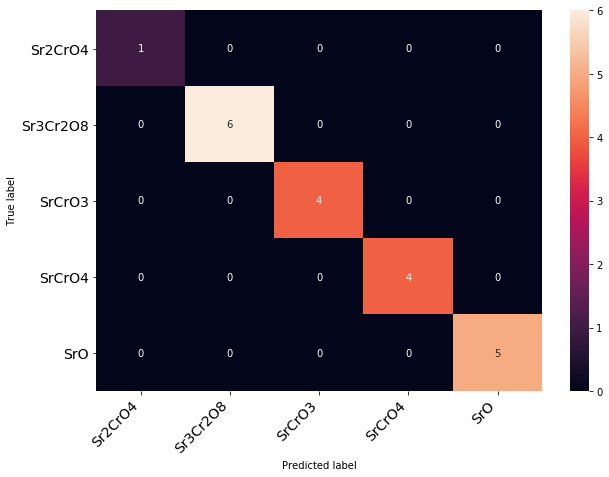

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
print_confusion_matrix(confusion_mat, ['Sr2CrO4','Sr3Cr2O8', 'SrCrO3', 'SrCrO4', 'SrO'])
plt.savefig("confusion_matrix_NN.png")